## 목표 : 연비 모델 예측
- 데이터 : mpg.csv
- 피쳐: weight와 horsepower
- 타겟 : mpg
- 학습 유형 : 지도학습


(1) 모듈 로딩 <hr>

In [1557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

- 데이터 준비 <hr>

In [1558]:

data_file = 'mpg.csv'

In [1559]:
dataDF=pd.read_csv(data_file)
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(2) 데이터 전처리 <hr>

In [1560]:
dataDF.info()
# horse power가 ? 때문에 object로 뜸
# 전처리를 해야함 !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [1561]:
dataDF.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [1562]:
dataDF=dataDF[dataDF['horsepower']!='?']

In [1563]:
dataDF["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [1564]:
dataDF["horsepower"]=dataDF["horsepower"].astype('float')

C:\Users\desktop\AppData\Local\Temp\ipykernel_8316\633710820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF["horsepower"]=dataDF["horsepower"].astype('float')


In [1565]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [1566]:
dataDF.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [1567]:
# 결측치 처리를 한 후 상관관계를 본 결과
# features 는 weight와 horsepower을 설정하기로 했다.

(3) 데이터 확인 <hr>

In [1568]:
def print_feature(nrows,ncols,target,features):
    for idx in range(len(features)):
        plt.subplot(nrows,ncols,idx+1)
        plt.hist(dataDF[features[idx]])
        
       
        plt.xlabel(features[idx])
        plt.ylabel(target)
    
    plt.show()
    

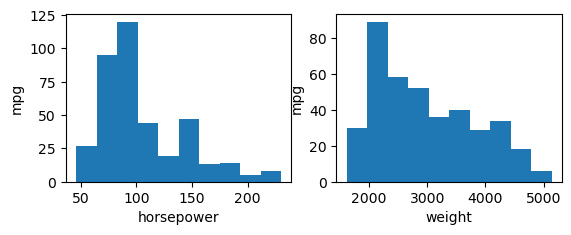

In [1569]:
print_feature(2,2,'mpg',['horsepower', 'weight'])

(4) 학습 준비 <hr>

- 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [1570]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [1571]:
# 피쳐와 타겟 분리
featureDF = dataDF[['weight','horsepower']]
featureDF.head(2)

,weight,horsepower
0,3504,130.0
1,3693,165.0


In [1572]:
targetDF = dataDF[['mpg']]
targetDF.head(2)

,mpg
0,18.0
1,15.0


In [1573]:
# 데이터셋 준비 => 70:30
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.3, random_state=890)

In [1574]:
print(f'[훈련용]x_train: {x_train.shape},y_train:{y_train.shape}')
print(f'[테스트용]X_test: {x_test.shape},y_test:{y_test.shape}')

[훈련용]x_train: (274, 2),y_train:(274, 1)
[테스트용]X_test: (118, 2),y_test:(118, 1)


(5) 피쳐 스케일링 => 훈련 데이터로 생성

In [1575]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [1576]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)

MinMaxScaler()

In [1577]:
rb_scaler = RobustScaler()
rb_scaler.fit(x_train)

RobustScaler()

In [1578]:
# 3가지 버전의 스케일링된 데이터셋 준비
std_X_train=std_scaler.transform(x_train)
std_X_test=std_scaler.transform(x_test)

mm_X_train=mm_scaler.transform(x_train)
mm_X_test=mm_scaler.transform(x_test)

rb_X_train=rb_scaler.transform(x_train)
rb_X_test=rb_scaler.transform(x_test)

(6) 학습 진행 <hr>

In [1579]:
from sklearn.linear_model import LinearRegression

In [1580]:
model = LinearRegression()
model.fit(std_X_train,y_train)

print(f'[모델 파라미터] =====>\ncoef_{model.coef_}\nintercept_{model.intercept_}')

[모델 파라미터] =====>
coef_[[-5.40966248 -1.32233633]]
intercept_[23.02153285]


(7) 모델 평가

In [1581]:
sccaler_list = [std_scaler,mm_scaler,rb_scaler]
train_list = []
test_list = []
for idx in sccaler_list:
   idx.fit(x_train)
   X_train=idx.transform(x_train)
   model.fit(x_train,y_train)
   train_model=model.score(x_train,y_train)
   train_list.append(train_model)
   X_test=idx.transform(x_test)
   test_model=model.score(x_test,y_test)
   test_list.append(test_model)
print(train_list)

[0.7100975314299298, 0.7100975314299298, 0.7100975314299298]


In [1582]:
## poly도 써보아요 ~^^

In [1583]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [1584]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,targetDF,test_size=0.3,random_state=50)

In [1585]:
poly_scaler = PolynomialFeatures(degree=4,include_bias=True)

In [1586]:
x_train_poly = poly_scaler.fit_transform(x_train)
x_test_poly = poly_scaler.transform(x_test)

In [1587]:
x_train_poly

array([[1.00000000e+00, 3.23000000e+03, 8.00000000e+01, ...,
        6.67705600e+10, 1.65376000e+09, 4.09600000e+07],
       [1.00000000e+00, 1.97000000e+03, 6.80000000e+01, ...,
        1.79452816e+10, 6.19431040e+08, 2.13813760e+07],
       [1.00000000e+00, 4.90600000e+03, 1.67000000e+02, ...,
        6.71255767e+11, 2.28495135e+10, 7.77796321e+08],
       ...,
       [1.00000000e+00, 3.60500000e+03, 1.25000000e+02, ...,
        2.03062891e+11, 7.04101562e+09, 2.44140625e+08],
       [1.00000000e+00, 2.37900000e+03, 9.40000000e+01, ...,
        5.00085879e+10, 1.97595934e+09, 7.80748960e+07],
       [1.00000000e+00, 2.95700000e+03, 8.80000000e+01, ...,
        6.77123667e+10, 2.01511270e+09, 5.99695360e+07]])

In [1588]:
x_test_poly

array([[1.00000000e+00, 2.94500000e+03, 1.10000000e+02, ...,
        1.04943602e+11, 3.91979500e+09, 1.46410000e+08],
       [1.00000000e+00, 3.32900000e+03, 1.00000000e+02, ...,
        1.10822410e+11, 3.32900000e+09, 1.00000000e+08],
       [1.00000000e+00, 2.13000000e+03, 8.80000000e+01, ...,
        3.51337536e+10, 1.45153536e+09, 5.99695360e+07],
       ...,
       [1.00000000e+00, 2.05000000e+03, 6.20000000e+01, ...,
        1.61544100e+10, 4.88572400e+08, 1.47763360e+07],
       [1.00000000e+00, 1.82500000e+03, 7.10000000e+01, ...,
        1.67896806e+10, 6.53187575e+08, 2.54116810e+07],
       [1.00000000e+00, 3.25000000e+03, 6.70000000e+01, ...,
        4.74150625e+10, 9.77479750e+08, 2.01511210e+07]])

In [1589]:
#학습진행
from sklearn.linear_model import LinearRegression

In [1590]:
model = LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [1591]:
print(f'[모델 파라미터] =====>\ncoef_{model.coef_}\nintercept_{model.intercept_}')

[모델 파라미터] =====>
coef_[[ 0.00000000e+00  7.74327579e-02  6.31794755e-02 -3.40752843e-05
  -4.10480368e-04  2.38616339e-03  1.09014848e-08 -2.56541009e-07
   9.13082365e-06 -8.06714303e-05 -1.85314262e-12  1.02088716e-10
  -2.78669719e-09  2.27219057e-08  7.86010022e-09]]
intercept_[-11.14703997]


In [1592]:
train_score = model.score(x_train_poly,y_train)
test_score = model.score(x_test_poly,y_test)
print(f'[Train Score]: {train_score} --- [Test Score]: {test_score}')

[Train Score]: 0.7354784674071766 --- [Test Score]: 0.7992566643660369
